In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### constants
LABELS = ['Normal', 'Fraud']
RANDOM_SEED = 105
TEST_SIZE = 0.2
DATASET = '../creditcard.csv'

In [3]:
### data reading
df = pd.read_csv(DATASET)

In [4]:
### data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### преобразуем данные, убираем колонку "время", т.к. она ни на что не влияет
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### отделяем X от Y
Y = data['Class'].values
X = data.drop(['Class'], axis=1).values

### делим данные
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=RANDOM_SEED, stratify=Y)

In [5]:
### количество мошенничеств в тестовых данных
sum(Y_test)

98

In [ ]:
'''
from sklearn.ensemble import IsolationForest

class IsolartionForestClassifier(IsolationForest):
    def decisicion_function(self, X_test):
        return (super().decision_function(X_test) + 1) / -2
'''

In [63]:
# Creating model
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=1000, n_jobs=-1)

In [64]:
### train model
model.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=-1, random_state=None, verbose=0, warm_start=False)

In [67]:
import joblib

file_name = 'IsolationForest_1000.pkl'

In [68]:
### saving model
with open(file_name, 'wb') as f:
    joblib.dump(model, f, compress=1)

In [10]:
### loading model
with open(file_name, 'rb') as f:
    model = joblib.load(file_name)

In [32]:
import numpy as np

predictions = model.decision_function(X_test)
backup = predictions
#predd = model.predict(X_test)

In [33]:
for i in range(len(predictions)):
    predictions[i] = (predictions[i] + 1) / -2

In [35]:
print(min(predictions))
print(max(predictions))

-0.5792249196590851
-0.3722241775572467


In [115]:
#from sklearn.preprocessing import StandardScaler
#pred = predictions.reshape(-1, 1)
#pred = scaler.fit_transform(pred)

In [122]:
#predictions = np.where(predictions == 1, 0, 1)

In [123]:
TP, FP, TN, FN = 0, 0, 0, 0

for prediction, true_class in zip(predictions, Y_test):
    TP += int(true_class and prediction)
    FN += int(true_class and not prediction)
    FP += int(not true_class and prediction)
    TN += int(not true_class and not prediction)

In [124]:
print('TP:', TP)  # мошенничество, определено правильно
print('FP:', FP)  # нормальная транзакция, определена неправильно
print('TN:', TN)  # нормальная транзакция, определена правильно
print('FN:', FN)  # мошенничество, определено неправильно

TP: 98
FP: 56864
TN: 0
FN: 0


In [125]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

0.0017204452090867595
1.0


In [27]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions, target_names=LABELS)
print(report)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [127]:
tpr = TP / (TP + FN)  # True positive rate
fpr = FP / (FP + TN)  # False positive rate

print(tpr)
print(fpr)

1.0
1.0


In [28]:
### Precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, Y_test)

ValueError: IsolationForest should be a binary classifier

In [129]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, predictions)

0.5

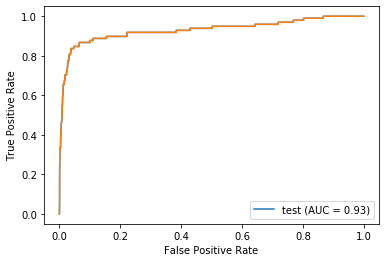

In [34]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)

viz = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=''
)
viz.plot(ax=None, name='test')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.show()

In [30]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(model, X_test, Y_test, name='Random forest')
plt.plot([0,1],[0,1],'r--')
plt.savefig('fname.svg', dpi=300, facecolor='w', edgecolor='red',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1)
plt.show()


ValueError: IsolationForest should be a binary classifier